# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.dtypes #check types for categorical data

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
customers.isna().sum() #check nulls

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
corr = customers.corr(method="spearman") #use spearman since there are some non-continuos variables
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.047156,-0.178541,0.613719,0.708922,-0.236294,0.745970,0.164936
Region,0.047156,1.000000,0.046885,0.040751,0.003535,-0.076756,0.010728,0.009313
Fresh,-0.178541,0.046885,1.000000,-0.083921,-0.119983,0.384395,-0.198333,0.238400
Milk,0.613719,0.040751,-0.083921,1.000000,0.773049,-0.092971,0.679979,0.372771
Grocery,0.708922,0.003535,-0.119983,0.773049,1.000000,-0.168831,0.801282,0.304256
Frozen,-0.236294,-0.076756,0.384395,-0.092971,-0.168831,1.000000,-0.207183,0.233024
Detergents_Paper,0.745970,0.010728,-0.198333,0.679979,0.801282,-0.207183,1.000000,0.183314
Delicassen,0.164936,0.009313,0.238400,0.372771,0.304256,0.233024,0.183314,1.000000


In [8]:
#sort top correlations excluding 1s
corr = corr.abs().unstack().sort_values(ascending=False)
corr[len(customers.columns):]

Grocery           Detergents_Paper    0.801282
Detergents_Paper  Grocery             0.801282
Milk              Grocery             0.773049
Grocery           Milk                0.773049
Channel           Detergents_Paper    0.745970
Detergents_Paper  Channel             0.745970
Channel           Grocery             0.708922
Grocery           Channel             0.708922
Detergents_Paper  Milk                0.679979
Milk              Detergents_Paper    0.679979
Channel           Milk                0.613719
Milk              Channel             0.613719
Fresh             Frozen              0.384395
Frozen            Fresh               0.384395
Delicassen        Milk                0.372771
Milk              Delicassen          0.372771
Grocery           Delicassen          0.304256
Delicassen        Grocery             0.304256
                  Fresh               0.238400
Fresh             Delicassen          0.238400
Channel           Frozen              0.236294
Frozen       

In [9]:
#check for outliers percentage in each column based on IQR rule of thumb
for col in customers.columns[2:]:
    Q1 = customers[col].quantile(0.25)
    Q3 = customers[col].quantile(0.75)
    IQR = Q3 - Q1 
    n_outliers = len([i for i in customers[col] if (i < Q1 - 1.5 * IQR) | (i > Q3 + 1.5 * IQR)])
    print(col, round(n_outliers/len(customers)*100,2),"%")

Fresh 4.55 %
Milk 6.36 %
Grocery 5.45 %
Frozen 9.77 %
Detergents_Paper 6.82 %
Delicassen 6.14 %


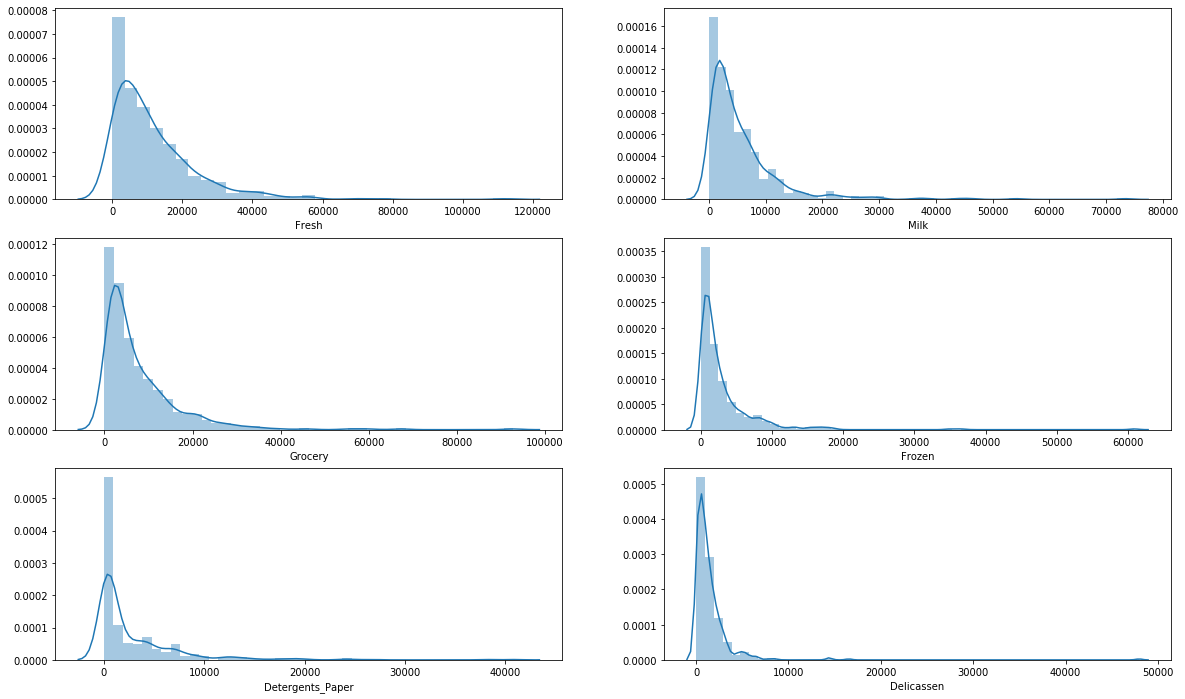

In [10]:
#check for distribution of columns, excluding Channel and Region cause not relevant
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
plt.sca(ax[0, 0])
sns.distplot(customers['Fresh'])
plt.sca(ax[0, 1])
sns.distplot(customers['Milk'])
plt.sca(ax[1, 0])
sns.distplot(customers['Grocery'])
plt.sca(ax[1, 1])
sns.distplot(customers['Frozen'])
plt.sca(ax[2, 0])
sns.distplot(customers['Detergents_Paper'])
plt.sca(ax[2, 1])
sns.distplot(customers['Delicassen'])
#Plot distributions to check skewness, there are outliers skewing all to the right...

In [11]:
#check Pareto law
customers.loc[:, "Tot"] = customers.drop(["Channel","Region"],axis=1).sum(axis=1)
top20_customers = customers["Tot"].sort_values(ascending=False)[:int(len(customers)*0.2)]
top20_sales = round(top20_customers.sum()/customers["Tot"].sum()*100,0)
print("top 20 customers account for:",top20_sales, "% of total sales")

top 20 customers account for: 43.0 % of total sales


In [12]:
# Your observations here
"""
1) Index represents single customers records. Columns from Fresh to Delicatessen are 
the annual spending in each product category respectively. Chennel is the sales channel (1 or 2)
and Region is the region of the customer
2) No categotical data to convert
3) No missing values
4) High correlation between Grocery and Detergents_Paper as well as between Milk and Grocery
5) Yes, there are siginificant outliers
6) Outliers are skweing distributions to the right
7) Pareto law does not apply to this set of data
"""

'\n1) Index represents single customers records. Columns from Fresh to Delicatessen are \nthe annual spending in each product category respectively. Chennel is the sales channel (1 or 2)\nand Region is the region of the customer\n2) No categotical data to convert\n3) No missing values\n4) High correlation between Grocery and Detergents_Paper as well as between Milk and Grocery\n5) Yes, there are siginificant outliers\n6) Outliers are skweing distributions to the right\n7) Pareto law does not apply to this set of data\n'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Your comment here
"""
We should probably drop Grocery column to get rid of multicollinearity problems
We should also remove the rows with outliers, to get closer to a normal distribution
"""

'\nWe should probably drop Grocery column to get rid of multicollinearity problems\nWe should also remove the rows with outliers, to get closer to a normal distribution\n'

In [14]:
#Drop Grocery and  also column created for total
#customers.drop(["Grocery","Tot"],axis=1, inplace=True)
#customers.head()

In [15]:
#remove outliers based on z score above 3 == values beyond 3 std.dev from the mean both sides.
from scipy import stats
customers_clean  = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]
customers_clean

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [16]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers_clean)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [17]:
# Your code here:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3, random_state=29)

# Train model
model = cluster.fit(customers_scale)
customers_clean.loc[:,"Labels"] = model.labels_ #assign labels of resulting clusters to column
customers_clean.head()

/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot,Labels
0,2,3,12669,9656,7561,214,2674,1338,34112,1
1,2,3,7057,9810,9568,1762,3293,1776,33266,1
2,2,3,6353,8808,7684,2405,3516,7844,36610,1
3,1,3,13265,1196,4221,6404,507,1788,27381,2
4,2,3,22615,5410,7198,3915,1777,5185,46100,2


Count the values in `labels`.

In [18]:
# Your code here:
customers_clean["Labels"].count()

414

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [19]:
# Your code here
from sklearn.cluster import DBSCAN

cluster_DB = DBSCAN(eps = 0.5)
model_DB = cluster_DB.fit(customers_scale)

customers_clean.loc[:,"Labels_DBSCAN"] = model_DB.labels_
customers_clean.head()

/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot,Labels,Labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,34112,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,33266,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,36610,1,-1
3,1,3,13265,1196,4221,6404,507,1788,27381,2,-1
4,2,3,22615,5410,7198,3915,1777,5185,46100,2,-1


Count the values in `labels_DBSCAN`.

In [20]:
# Your code here
customers_clean["Labels_DBSCAN"].count()

414

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

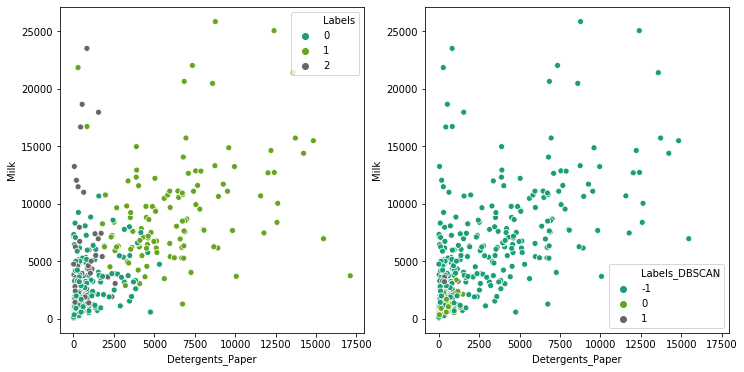

In [21]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(ax[0])
sns.scatterplot(x="Detergents_Paper", y="Milk", hue="Labels", data = customers_clean, palette="Dark2")
plt.sca(ax[1])
sns.scatterplot(x="Detergents_Paper", y="Milk", hue="Labels_DBSCAN", data = customers_clean,palette="Dark2")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

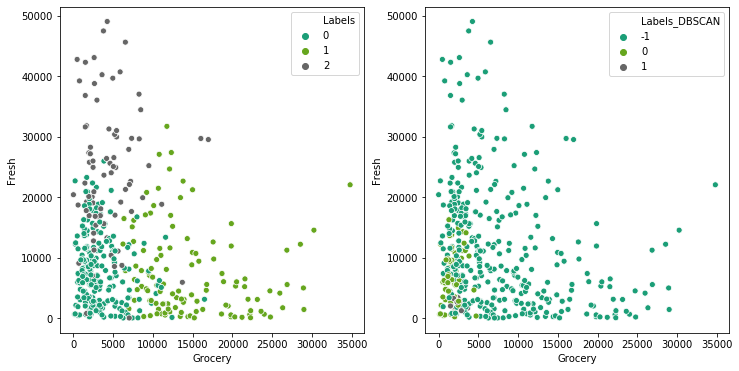

In [22]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(ax[0])
sns.scatterplot(x="Grocery", y="Fresh", hue="Labels", data = customers_clean,palette="Dark2")
plt.sca(ax[1])
sns.scatterplot(x="Grocery", y="Fresh", hue="Labels_DBSCAN", data = customers_clean,palette="Dark2")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

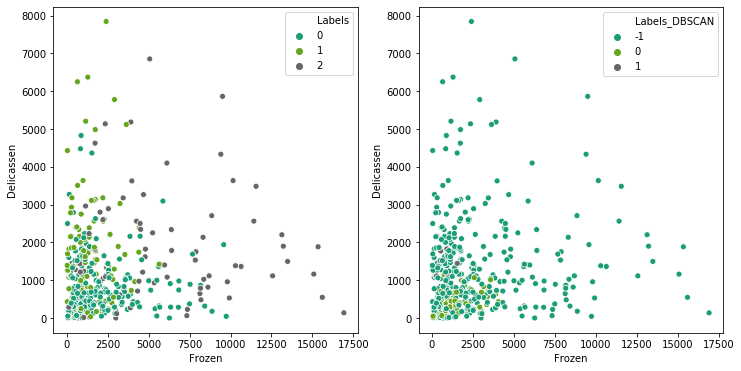

In [23]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(ax[0])
sns.scatterplot(x="Frozen", y="Delicassen", hue="Labels", data = customers_clean,palette="Dark2")
plt.sca(ax[1])
sns.scatterplot(x="Frozen", y="Delicassen", hue="Labels_DBSCAN", data = customers_clean,palette="Dark2")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [24]:
# Your code here:
customers_clean.drop("Labels_DBSCAN",axis=1).groupby(by="Labels").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot
Labels,,,,,,,,,
0,1.050228,2.479452,7730.269406,2521.337900,3358.680365,2043.000000,811.447489,811.840183,17276.575342
1,1.957627,2.652542,7362.567797,9462.118644,14732.296610,1331.347458,6398.974576,1639.915254,40927.220339
2,1.077922,2.584416,24324.103896,4523.012987,4507.168831,5858.987013,646.740260,1833.818182,41693.831169


In [25]:
customers_clean.drop("Labels",axis=1).groupby(by="Labels_DBSCAN").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot
Labels_DBSCAN,,,,,,,,,
-1,1.37464,2.461095,11558.708934,5533.051873,7765.178674,2775.896254,2757.412104,1369.253602,31759.501441
0,1.00000,3.000000,6876.830508,1228.508475,1816.644068,1438.457627,378.000000,440.101695,12178.542373
1,1.00000,3.000000,2257.875000,3065.500000,2414.375000,944.125000,432.625000,1426.250000,10540.750000


Which algorithm appears to perform better?

In [26]:
# Your observations here
"""
It seems that the clustering performed by DBSCAN is more accurate. The means of the clusters per
column are more spread apart. Not sure, but i cannot see any other pattern for each cluster in
the way they link the means of each column together...
"""

'\nIt seems that the clustering performed by DBSCAN is more accurate. The means of the clusters per\ncolumn are more spread apart. Not sure, but i cannot see any other pattern for each cluster in\nthe way they link the means of each column together...\n'

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

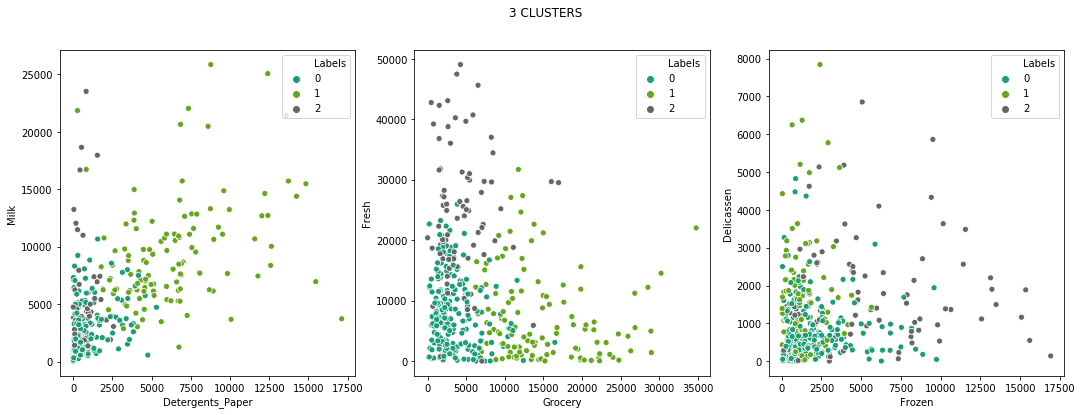

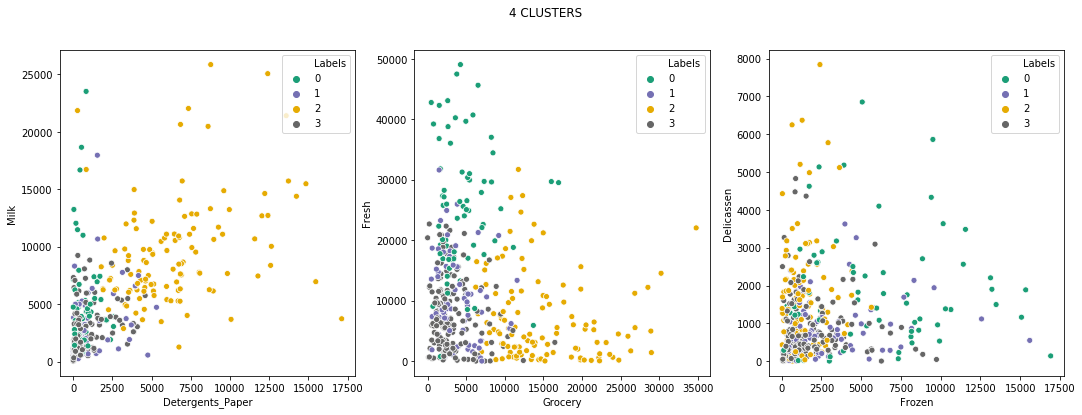

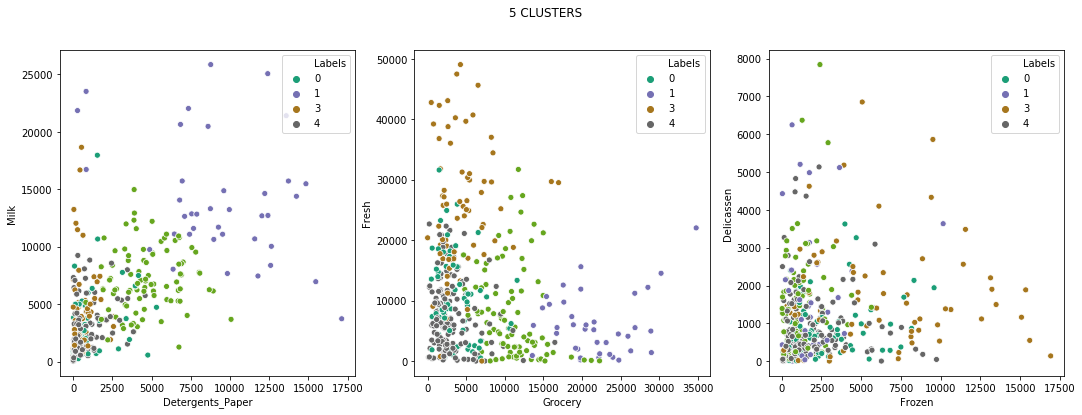

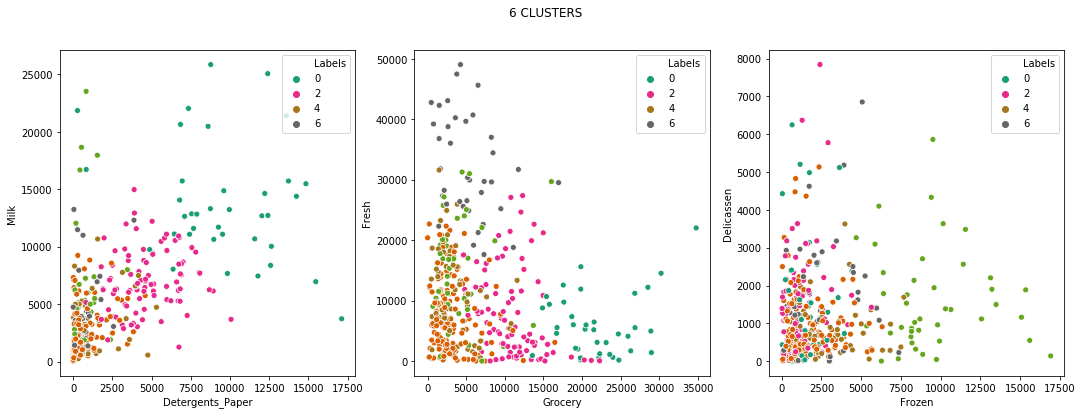

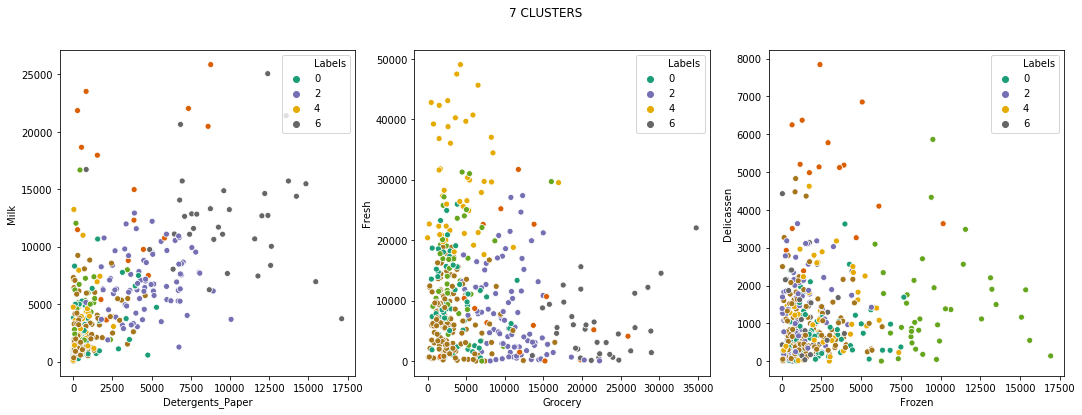

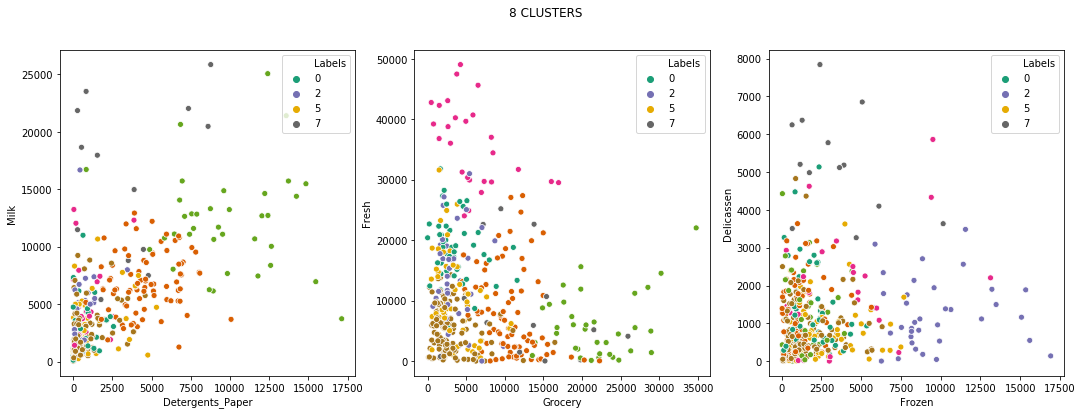

In [27]:
# Your code here
for k in range(3,9,1):
    cluster = KMeans(n_clusters=k, random_state=29)

    # Train model
    model = cluster.fit(customers_scale)
    customers_clean.loc[:,"Labels"] = model.labels_ #assign labels of resulting clusters to column
    customers_clean.head()
    
    #Plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    plt.sca(ax[0])
    sns.scatterplot(x="Detergents_Paper", y="Milk", hue="Labels", data = customers_clean,palette="Dark2")
    plt.sca(ax[1])
    sns.scatterplot(x="Grocery", y="Fresh", hue="Labels", data = customers_clean,palette="Dark2")
    plt.sca(ax[2])
    sns.scatterplot(x="Frozen", y="Delicassen", hue="Labels", data = customers_clean,palette="Dark2")
    fig.suptitle("%s CLUSTERS" % k,fontsize=12)
    



In [28]:
# Your comment here
"""
Visually looking at the same pairs of features it seems that 3 or 4 is the most appropriate
number of clusters, as the number increases the model does not seem able to separate the data in
a meaningful way.
"""

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/mattia/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

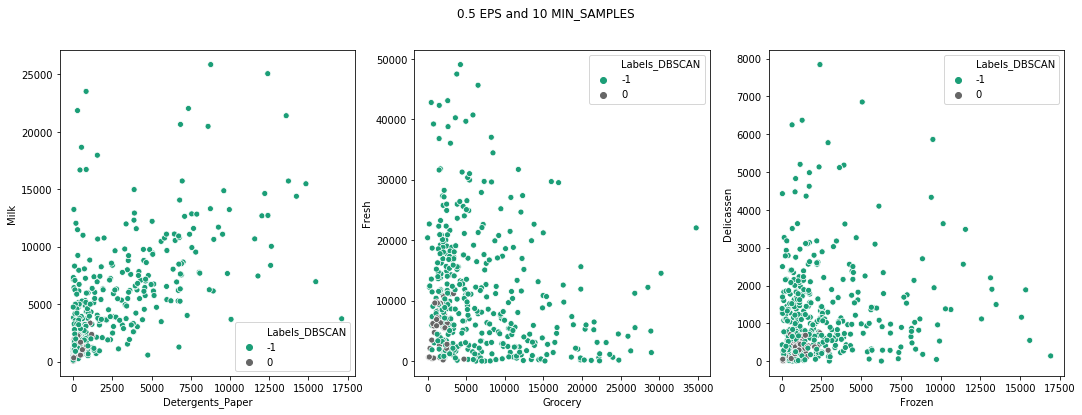

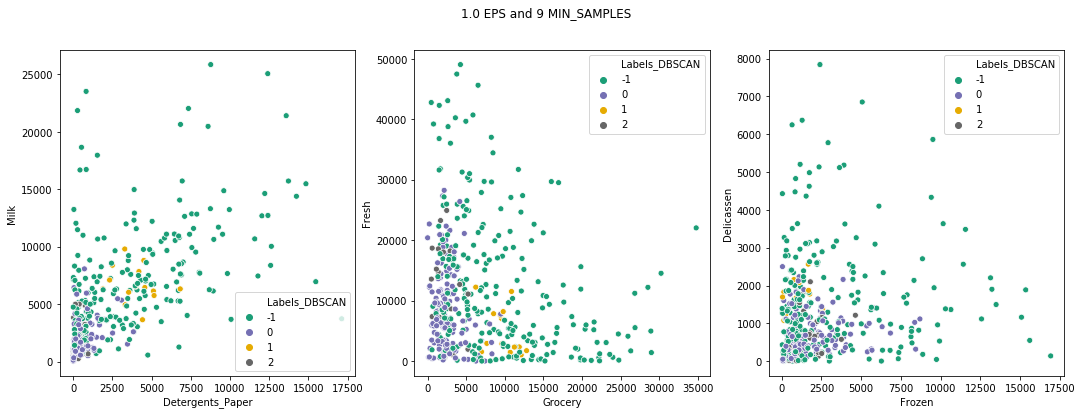

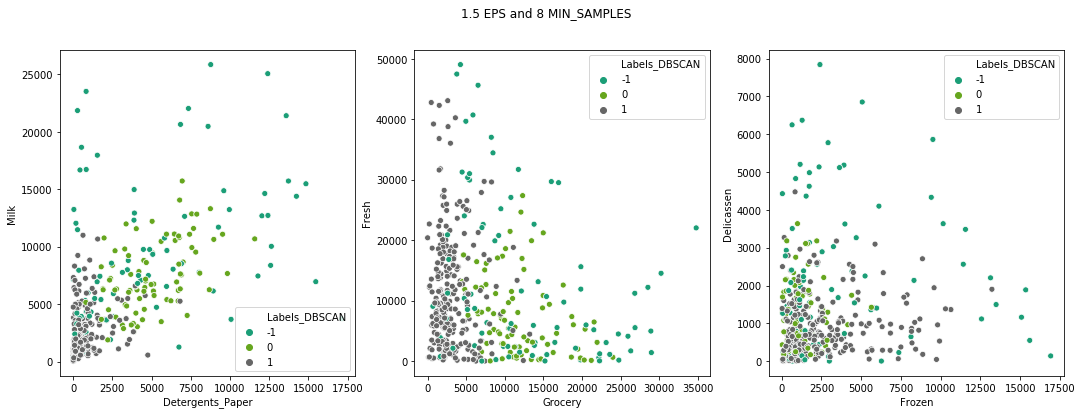

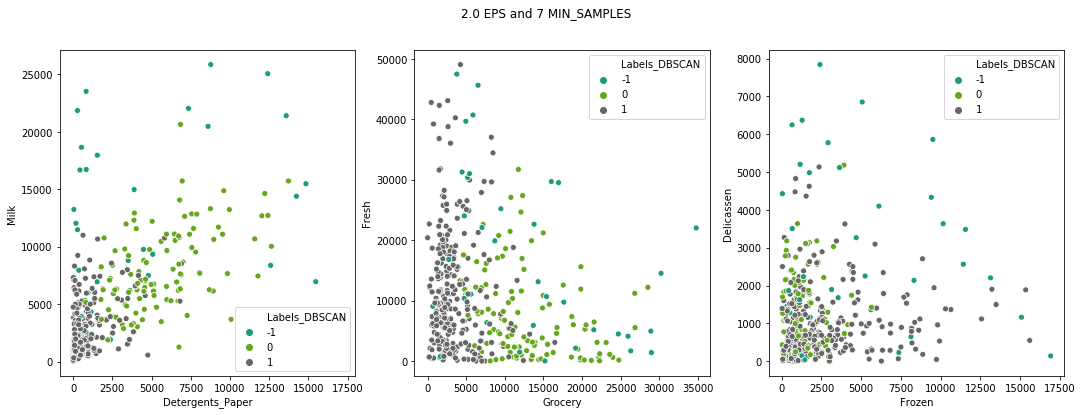

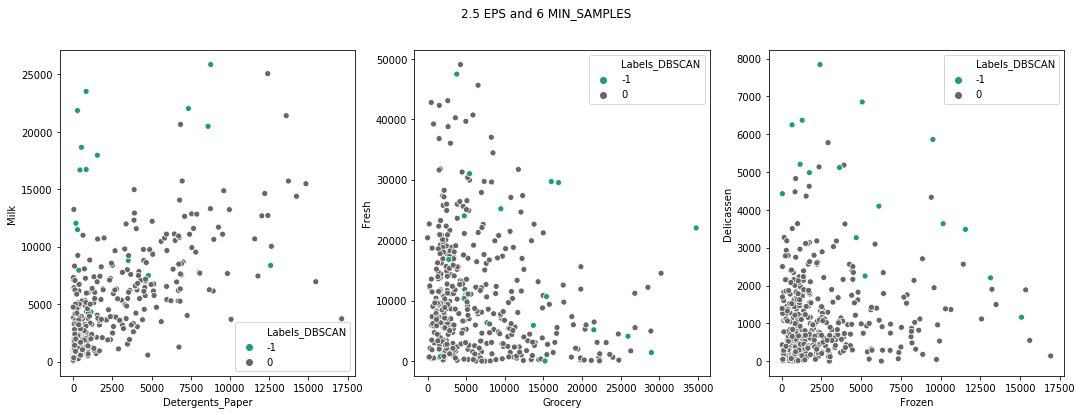

In [45]:
# Your code here
for k,s in zip(np.arange(0.5,3,0.5),range(10,5,-1)):
    cluster_DB = DBSCAN(eps = k, min_samples=s)
    model_DB = cluster_DB.fit(customers_scale)

    customers_clean.loc[:,"Labels_DBSCAN"] = model_DB.labels_
        
    #Plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    plt.sca(ax[0])
    sns.scatterplot(x="Detergents_Paper", y="Milk", hue="Labels_DBSCAN", data = customers_clean,palette="Dark2")
    plt.sca(ax[1])
    sns.scatterplot(x="Grocery", y="Fresh", hue="Labels_DBSCAN", data = customers_clean,palette="Dark2")
    plt.sca(ax[2])
    sns.scatterplot(x="Frozen", y="Delicassen", hue="Labels_DBSCAN", data = customers_clean,palette="Dark2")
    fig.suptitle(f"{k} EPS and {s} MIN_SAMPLES",fontsize=12)
    

In [46]:
# Your comment here
"""
It seems that increasing EPS and decreasing MIN_SAMPLES is benefiting the capacity of the model
to cluster the data, in particular the combinations 1.5 & 8 and 2 & 7 seem to generate more
meaningfull clusters. This I think makes some sense if I have understood... since we are increasing the "area" of the
cluster through a bigger EPS, and at the same time allowing for less neighbors for a point to
be considered a core one. 
"""

'\nIt seems that increasing EPS and decreasing MIN_SAMPLES is benefiting the capacity of the model\nto cluster the data, in particular the combinations 1.5 & 8 and 2 & 7 seem to generate more\nmeaningfull clusters. This I think makes some sense if I have understood... since we are increasing the "area" of the\ncluster through a bigger EPS, and at the same time allowing for less neighbors for a point to\nbe considered a core one. \n'